# Task 3: Modellkapazität und Generalisierung

Untersuchung des Einflusses der Hidden Layer Größe auf Training und Generalisierung.

In [ ]:
import sys
sys.path.append('..')

import numpy as np
from src.mlp_one_hidden import MLPOneHiddenLayer
from src.visualization import plot_hidden_size_vs_accuracy

In [2]:
data = np.load("../data/spiral_dataset.npz")
X_train, y_train = data["X_train"], data["y_train"]
X_test, y_test = data["X_test"], data["y_test"]

## Training mit verschiedenen Hidden Layer Größen

In [3]:
hidden_sizes = [1, 2, 4, 5, 8, 16]
train_accs = []
test_accs = []

for h in hidden_sizes:
    model = MLPOneHiddenLayer(hidden_dim=h, lr=0.1, epochs=1500, seed=42)
    model.fit(X_train, y_train, batch_size=1)
    
    train_acc = (model.predict(X_train) == np.argmax(y_train, axis=1)).mean()
    test_acc = (model.predict(X_test) == np.argmax(y_test, axis=1)).mean()
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    print(f"Hidden={h:2d}: Train={train_acc:.3f}, Test={test_acc:.3f}")

Hidden= 1: Train=0.586, Test=0.556
Hidden= 2: Train=0.762, Test=0.722
Hidden= 4: Train=0.924, Test=0.922
Hidden= 5: Train=0.967, Test=0.944
Hidden= 8: Train=0.986, Test=0.989
Hidden=16: Train=0.990, Test=0.989


## Visualisierung

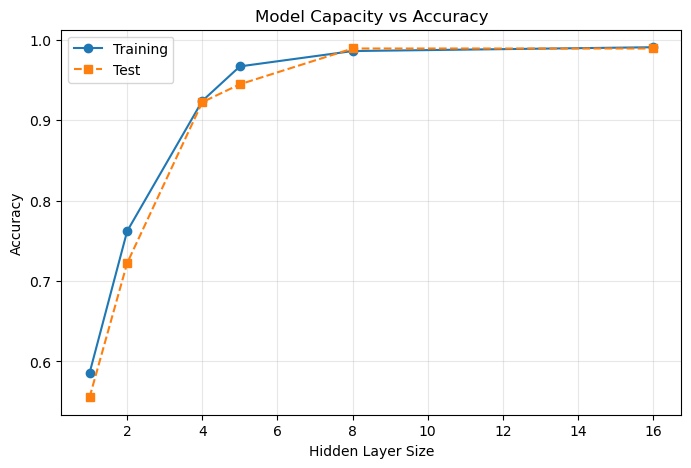

In [9]:
import os
os.makedirs('../results', exist_ok=True)
plot_hidden_size_vs_accuracy(hidden_sizes, train_accs, test_accs, '../results/task3_capacity_comparison.pdf')

# Inline anzeigen
plt.figure(figsize=(8, 5))
plt.plot(hidden_sizes, train_accs, 'o-', label='Training')
plt.plot(hidden_sizes, test_accs, 's--', label='Test')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Accuracy')
plt.title('Model Capacity vs Accuracy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Beobachtungen

- Kleine Hidden Layer (1-2): Unterfit - zu wenig Kapazität für nichtlineare Grenzen
- Mittlere Hidden Layer (4-8): Gute Balance zwischen Training und Test
- Große Hidden Layer (16+): Potentielles Overfitting